In [1]:
#!pip freeze > ../requests.txt
#!pip install sklearn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
PATH1 = "../data/Desafio de Dados FieldPRO/Sensor_FieldPRO.csv"
PATH2 = "../data/Desafio de Dados FieldPRO/Estacao_Convencional.csv"

sensor_df = pd.read_csv(PATH1)
estacao_df = pd.read_csv(PATH2)

In [4]:
sensor_df.shape, sensor_df.columns

((1711, 7),
 Index(['Datetime – utc', 'air_humidity_100', 'air_temperature_100',
        'atm_pressure_main', 'num_of_resets', 'piezo_charge',
        'piezo_temperature'],
       dtype='object'))

In [5]:
estacao_df.shape, estacao_df.columns

((2256, 3), Index(['data', 'Hora (Brasília)', 'chuva'], dtype='object'))

In [6]:
sensor_df.isna().sum()
#sensor_df[sensor_df.air_humidity_100.isna()]
#sensor_df[sensor_df.num_of_resets.eq(3)]

Datetime – utc         0
air_humidity_100       6
air_temperature_100    6
atm_pressure_main      0
num_of_resets          0
piezo_charge           0
piezo_temperature      0
dtype: int64

In [7]:
sensor_df['data'] = pd.to_datetime(sensor_df['Datetime – utc'])

In [8]:
sensor_df['data'] = sensor_df.data.astype(str).str.split('+',expand=True)[0]

In [9]:
sensor_df.data

0       2020-09-30 23:00:00
1       2020-10-01 00:00:00
2       2020-10-01 01:00:00
3       2020-10-01 02:00:00
4       2020-10-01 03:00:00
               ...         
1706    2020-12-11 09:00:00
1707    2020-12-11 10:00:00
1708    2020-12-11 11:00:00
1709    2020-12-11 12:00:00
1710    2020-12-11 13:00:00
Name: data, Length: 1711, dtype: object

In [10]:
estacao_df#.isna().sum()
estacao_df['data'] = estacao_df.data + ' ' + estacao_df['Hora (Brasília)']

In [11]:
estacao_df

,data,Hora (Brasília),chuva
0,2020-09-01 00:00:00,00:00:00,0.0
1,2020-09-01 01:00:00,01:00:00,0.0
2,2020-09-01 02:00:00,02:00:00,0.0
3,2020-09-01 03:00:00,03:00:00,0.0
4,2020-09-01 04:00:00,04:00:00,0.0
...,...,...,...
2251,2020-12-03 19:00:00,19:00:00,0.0
2252,2020-12-03 20:00:00,20:00:00,0.0
2253,2020-12-03 21:00:00,21:00:00,0.0
2254,2020-12-03 22:00:00,22:00:00,0.0


In [12]:
dados_df = pd.merge(sensor_df,estacao_df[['data','chuva']], on='data')

In [13]:
dados_df.dropna(inplace=True)

<AxesSubplot:>

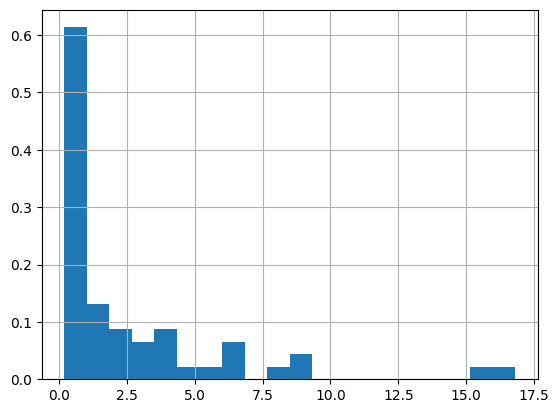

In [14]:
#dados_df.chuva.hist(density=True, bins=20)
dados_df[~dados_df.chuva.eq(0)].chuva.hist(density=True, bins=20)

<AxesSubplot:>

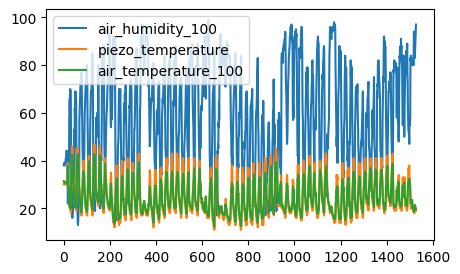

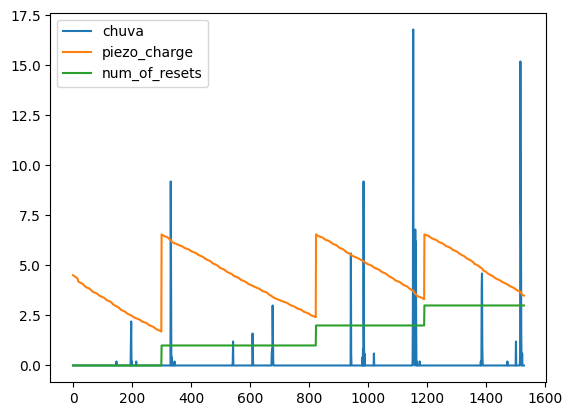

In [15]:
fig, ax = plt.subplots(figsize=(5,3))
#plt.subplot(121)
dados_df[['air_humidity_100']].plot(ax=ax)
dados_df[['piezo_temperature']].plot(ax=ax)
dados_df[['air_temperature_100']].plot(ax=ax)

#plt.subplot(122)
ax2 = dados_df[['chuva']].plot()
(dados_df[['piezo_charge']]/10000).plot(ax=ax2)
dados_df[['num_of_resets']].plot(ax=ax2)


#ax = plt.hist(sensor_df.piezo_charge)

In [16]:
dados_df['dif_charge'] = dados_df.groupby('num_of_resets').piezo_charge.diff(-1)
dados_df.dropna(inplace=True)
#aux = dados_df[dados_df.num_of_resets.eq(1)]
#aux.piezo_charge.diff(-1)

In [17]:
dados_df.isna().sum()

Datetime – utc         0
air_humidity_100       0
air_temperature_100    0
atm_pressure_main      0
num_of_resets          0
piezo_charge           0
piezo_temperature      0
data                   0
chuva                  0
dif_charge             0
dtype: int64

<AxesSubplot:>

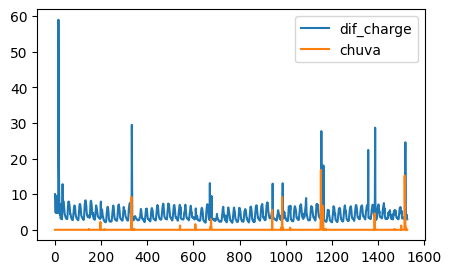

In [18]:
fig, ax = plt.subplots(figsize=(5,3))
#plt.subplot(121)
(dados_df[['dif_charge']]/20).plot(ax=ax)
#dados_df[['piezo_temperature']].plot(ax=ax)
#dados_df[['air_temperature_100']].plot(ax=ax)

#plt.subplot(122)
(dados_df[['chuva']]).plot(ax=ax)
#(dados_df[['piezo_charge']]/10000).plot(ax=ax2)
#dados_df[['num_of_resets']].plot(ax=ax2)


#ax = plt.hist(sensor_df.piezo_charge)

In [19]:
#ax = dados_df.loc[810:1100].chuva.plot()
#(dados_df.loc[810:1100,['piezo_charge']]/10000).plot(ax=ax)
sns.scatterplot(data=dados_df.loc[810:1100], x='piezo_charge', y='chuva', hue='num_of_resets')

NameError: name 'sns' is not defined

In [ ]:
dados_df[['piezo_temperature','air_temperature_100']]
ax = (dados_df['air_temperature_100'] - dados_df['piezo_temperature'].astype(float)).plot(label='dif-temp')
dados_df[['air_humidity_100']].plot(ax=ax)
plt.legend()
#dados_df.dtypes

In [ ]:
import seaborn as sns

In [ ]:
sns.heatmap(dados_df.corr(), annot=True)

# Calibrator

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
dados_df.drop('Datetime – utc', axis=1, inplace=True)

In [ ]:
X = dados_df.copy()
X.drop('data', axis=1, inplace=True)
y = X.pop('chuva')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
calibrador_RF = RandomForestRegressor(random_state=42, bootstrap=True)
calibrador_RF.fit(X_train, y_train)

In [ ]:
calibrador_SVR = SVR()
calibrador_SVR.fit(X_train, y_train)

In [ ]:
calibrador_RF.score(X_train, y_train), calibrador_RF.score(X_test, y_test)
#r2_score(y_test, calibrador.predict(X_test))

In [ ]:
calibrador_SVR.score(X_train, y_train), calibrador_SVR.score(X_test, y_test)


In [ ]:
calibrador_SGD = make_pipeline(StandardScaler(),SGDRegressor(max_iter=1000, tol=1e-3))

In [ ]:
#calibrador_SGD = SGDRegressor()
calibrador_SGD.fit(X_train, y_train)

In [ ]:
calibrador_SGD.score(X_train, y_train), calibrador_SGD.score(X_test, y_test)

### Bootstrap

In [ ]:
X_bst = pd.concat([X_train, y_train], axis=1)

In [ ]:
N = 5000

In [ ]:
X_bst = X_bst.sample(n=N, replace=True)

In [ ]:
y_train = X_bst.pop('chuva')
X_train = X_bst

In [ ]:
calibrador_RF = RandomForestRegressor(random_state=42, bootstrap=True)
calibrador_RF.fit(X_train, y_train)

In [ ]:
calibrador_RF.score(X_train, y_train), calibrador_RF.score(X_test, y_test)
#r2_score(y_test, calibrador_RF.predict(X_test))

In [ ]:
df_aux = X_bst[~X_bst.chuva.eq(0)]
df_aux = df_aux.sample(n=N, replace=True)

In [ ]:
X_bst = pd.concat([X_bst,df_aux], ignore_index=True)

In [ ]:
y_train = X_bst.pop('chuva')
X_train = X_bst

In [ ]:
calibrador_RF = RandomForestRegressor(random_state=42, bootstrap=True)
calibrador_RF.fit(X_train, y_train)

In [ ]:
calibrador_RF.score(X_train, y_train), calibrador_RF.score(X_test, y_test)
#r2_score(y_test, calibrador.predict(X_test))